# This notebook contains Exploratory and Statistical Data Analysis, Algorithmic implementation and the Final Results.

We will start by importing the Data we that we cleaned previously.

In [1]:
import pandas as pd
import numpy as np
import math
# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [2]:
%matplotlib inline

In [3]:
dataset = pd.read_csv('DataCleanedFinal.csv')
dataset.head()

,Locality,RestaurantName,Address,Category,CostForTwo,Cuisines,Ratings,votes,Latitude,Longitude
0,C Scheme,Kanha,"E 62, Bhagat Singh Marg, C Scheme, Jaipur","Sweet Shop, Quick Bites",500,"North Indian, South Indian, Fast Food, Chinese...",4.2,995.0,26.912258,75.800590
1,C Scheme,Stepout Cafe,"P 14, Sehdev Marg, Ashok Nagar, C Scheme, Jaipur","Café, Casual Dining",800,"Cafe, Italian, Lebanese, Mexican, Continental,...",4.5,1385.0,26.905899,75.802078
2,C Scheme,Burger Farm,"3 & 4, Trimurty, V-Jai City Point Building, Ah...",Quick Bites,400,"Burger, Fast Food, Beverages",4.1,1427.0,26.914246,75.804930
3,C Scheme,Domino's Pizza,"C 18, Silver Square Mall, Bhagwandas Marg, C S...",Quick Bites,700,"Pizza, Fast Food",3.3,1258.0,26.915043,75.809926
4,C Scheme,Thali and More,"C-46 B, Sarojini Marg, Above Punjab National B...",Casual Dining,1100,"North Indian, South Indian, Chinese, Fast Food",4.4,2339.0,26.910926,75.805679


## Exploratory Data Analysis

### Top 50 Restaurant outlets in Jaipur  
**Based on the number of Outlets**

In [4]:
resHist = dataset.groupby('RestaurantName')['Address'].count()
resHist = resHist.sort_values()[-50:]

In [5]:
sns.set(rc={'figure.figsize':(15,8)})

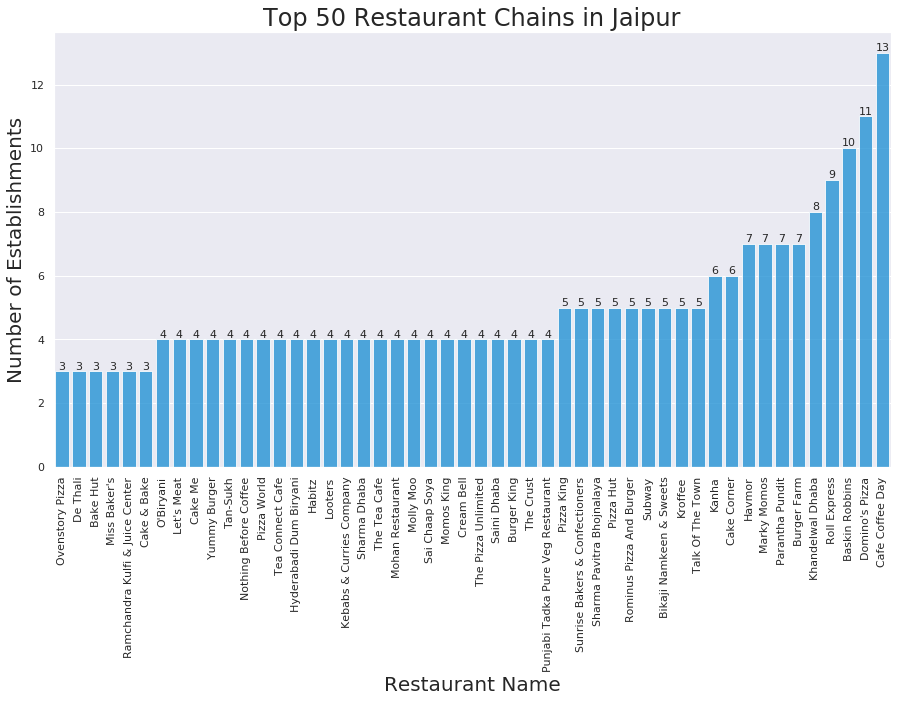

In [6]:
ax1 = sns.barplot(x=resHist.index, y=resHist.values, color='#069af3', alpha=0.8)
rects = ax1.patches
labels = list(resHist)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax1.text(rect.get_x()+rect.get_width()/2, height,label,ha='center',
           va='bottom', fontsize=11)
plt.xticks(rotation=90)

ax1.set_xlabel('Restaurant Name', fontsize=20)
ax1.set_ylabel('Number of Establishments', fontsize=20)
ax1.set_title('Top 50 Restaurant Chains in Jaipur', fontsize=24)
plt.show()

Clearly CCD has the most number of Outlets in Jaipur with Dominos and Baskin Robins trailing close.

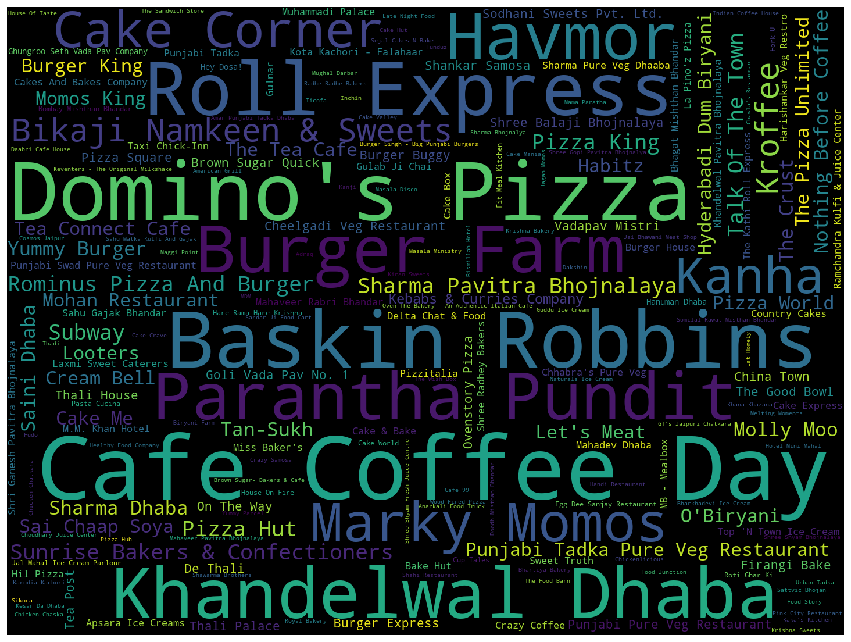

In [7]:
from subprocess import check_output
from wordcloud import WordCloud
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(dataset['RestaurantName'].value_counts()))


fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Number of Restaurants in a locality.

In [8]:
localityGrouped = dataset.groupby('Locality')['RestaurantName'].count().sort_values(ascending=False)

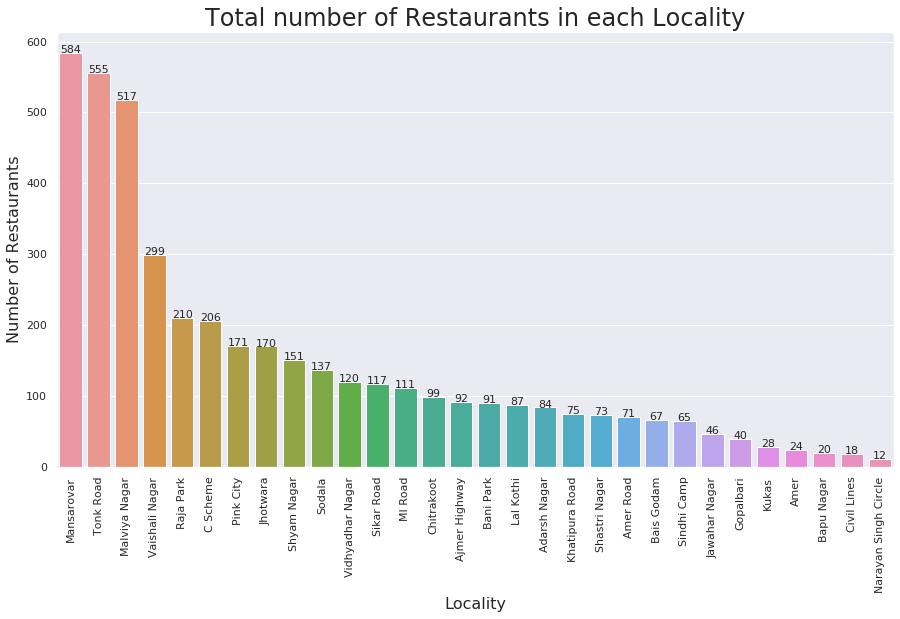

In [9]:
ax2 = sns.barplot(x=localityGrouped.index, y=localityGrouped.values)

rects2 = ax2.patches
labels2 = list(localityGrouped)
for rect, label in zip(rects2, labels2):
    height = rect.get_height()
    ax2.text(rect.get_x()+rect.get_width()/2, height, label, ha='center', fontsize=11)
plt.xticks(rotation=90)
ax2.set_xlabel('Locality', fontsize=16)
ax2.set_ylabel('Number of Restaurants', fontsize=16)
ax2.set_title('Total number of Restaurants in each Locality', fontsize=24)
plt.show()

Mansarovar has the most number of Restaurants followed closely by Tonk Road and Malviya Nagar.

### Density of Restaurants in each Locality

Let's first get the Geographical coordinates for each locality.

In [10]:
import googlemaps
import json

In [11]:
API_KEY = None
with open('/home/hotpie/Projects/API_KEYS/API_KEYS.json','r') as f:
    file = json.load(f)
API_KEY = file['google-api-key']
gmaps = googlemaps.Client(key=API_KEY)

In [12]:
def getLatlong(loc):
    latlng=None
    g = gmaps.geocode('{}, Jaipur, Rajasthan'.format(loc))
    latlng = [g[0]['geometry']['location']['lat'], g[0]['geometry']['location']['lng']]
    print("LOC:",loc,"Lat:",latlng[0],"Lng:",latlng[1])
    lat.append(latlng[0])
    lng.append(latlng[1])

In [15]:
locs = dataset['Locality'].unique()

In [16]:
lat = []
lng = []
for item in locs:
    getLatlong(item)

LOC: C Scheme Lat: 26.9132858 Lng: 75.80344649999999
LOC: Malviya Nagar Lat: 26.8548662 Lng: 75.8242966
LOC: Tonk Road Lat: 26.831362 Lng: 75.7941379
LOC: Vaishali Nagar Lat: 26.9047751 Lng: 75.74886409999999
LOC: MI Road Lat: 26.9167265 Lng: 75.8129462
LOC: Mansarovar Lat: 26.8504593 Lng: 75.76277019999999
LOC: Raja Park Lat: 26.8947446 Lng: 75.8301169
LOC: Bani Park Lat: 26.930559 Lng: 75.793611
LOC: Bais Godam Lat: 26.8971351 Lng: 75.7863962
LOC: Adarsh Nagar Lat: 26.9018769 Lng: 75.8271749
LOC: Ajmer Highway Lat: 26.8938114 Lng: 75.74720839999999
LOC: Lal Kothi Lat: 26.8931628 Lng: 75.7982442
LOC: Gopalbari Lat: 26.920487 Lng: 75.7899187
LOC: Sodala Lat: 26.9059167 Lng: 75.77273199999999
LOC: Shyam Nagar Lat: 26.888214 Lng: 75.7611853
LOC: Sindhi Camp Lat: 26.9252337 Lng: 75.8010876
LOC: Pink City Lat: 26.9124336 Lng: 75.7872709
LOC: Amer Lat: 26.9880088 Lng: 75.861032
LOC: Civil Lines Lat: 26.9059311 Lng: 75.78443829999999
LOC: Chitrakoot Lat: 26.9020408 Lng: 75.7357806
LOC: Naray

Map the geographical coordinates in the dataset.

In [17]:
dataset['location_lat'] = dataset['Locality'].map(dict(zip(locs,lat)))
dataset['location_lng'] = dataset['Locality'].map(dict(zip(locs,lng)))

In [18]:
tempDf = dataset.groupby('Locality')['location_lat','location_lng'].first()

<ipython-input-18-a3aabbc453fe>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tempDf = dataset.groupby('Locality')['location_lat','location_lng'].first()


In [19]:
map_ = folium.Map(location=[26.9124336,75.7872709], zoom_start=12)

for lat, lng, loc in zip(tempDf['location_lat'], tempDf['location_lng'], tempDf.index):
    folium.CircleMarker([lat,lng],
                       radius=5,
                       color='yellow',
                       fill=True,
                       fill_color='blue',
                        fill_opacity=0.8).add_to(map_)
    folium.Marker([lat,lng],popup=loc).add_to(map_)
map_

In [28]:
tempDf['nRes'] = dataset.groupby('Locality')['RestaurantName'].count()

In [29]:
bins = pd.IntervalIndex.from_tuples([(0,100),(101,200),(201,300),(500,600)])
tempDf['category'] = pd.cut(tempDf['nRes'], bins)

In [30]:
x = tempDf.groupby('category').groups.keys()

In [31]:
densityMap = folium.Map(location=[26.9124336,75.7872709], zoom_start=12)

# Add circle markers
for lat, lng in zip(tempDf.location_lat, tempDf.location_lng):
    folium.CircleMarker([lat,lng],
                       radius=5,
                       color='black',
                       fill=True,
                       fill_color='yellow',
                       fill_opacity=0.6).add_to(densityMap)

# Add Popup markers
j=0
colors = ['red', 'purple', 'green', 'orange']

for i in range(0,len(list(x))):
    group = tempDf.groupby('category').get_group(list(x)[i])
    k=0
    for lat, lng in zip(group.location_lat, group.location_lng):
        folium.Marker([lat,lng],
                     popup=group.index[k],
                     icon=folium.Icon(color=colors[j], 
                      icon='cloud')).add_to(densityMap)
        k=k+1
    j=j+1

# Add legend
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Number of restaurants</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>0-100</li>
    <li><span style='background:purple;opacity:0.7;'></span>101-200</li>
    <li><span style='background:green;opacity:0.7;'></span>201-300</li>
    <li><span style='background:orange;opacity:0.7;'></span>501-600</li>
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)
macro.add_to(densityMap)
densityMap

### Localities by Rating

In [32]:
rateRes = dataset.groupby('Locality')['location_lat','location_lng'].first()
rateRes['ratings'] = dataset.groupby('Locality')['Ratings'].mean()
rateRes

<ipython-input-32-f21f8e1412dc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rateRes = dataset.groupby('Locality')['location_lat','location_lng'].first()


,location_lat,location_lng,ratings
Locality,,,
Adarsh Nagar,26.901877,75.827175,3.402703
Ajmer Highway,26.893811,75.747208,3.331034
Amer,26.988009,75.861032,3.342857
Amer Road,26.964148,75.846664,3.244231
Bais Godam,26.897135,75.786396,3.374138
Bani Park,26.930559,75.793611,3.463158
Bapu Nagar,26.889825,75.808361,3.477778
C Scheme,26.913286,75.803446,3.683815
Chitrakoot,26.902041,75.735781,3.336486


In [43]:
ratingBins = pd.IntervalIndex.from_tuples([(3.1,3.2),(3.21,3.3),(3.31,3.40),(3.41,3.5),(3.51,3.6),(3.61,3.7),(3.71,3.8)])
rateRes['category'] = pd.cut(rateRes['ratings'], ratingBins)

In [44]:
xRate = rateRes.groupby('category').groups.keys()

In [45]:
xRate

dict_keys([Interval(3.1, 3.2, closed='right'), Interval(3.21, 3.3, closed='right'), Interval(3.31, 3.4, closed='right'), Interval(3.41, 3.5, closed='right'), Interval(3.51, 3.6, closed='right'), Interval(3.61, 3.7, closed='right'), Interval(3.71, 3.8, closed='right')])

In [46]:
ratingsMap = folium.Map(location=[26.9124336,75.7872709], zoom_start=12)

# Add circle markers
for lat, lng in zip(rateRes.location_lat, rateRes.location_lng):
    folium.CircleMarker([lat,lng],
                       radius=5,
                       color='black',
                       fill=True,
                       fill_color='yellow',
                       fill_opacity=0.6).add_to(ratingsMap)

# Add Popup markers
j=0
i=0
ratingColors = ['red', 'blue', 'green', 'purple', 'orange', 'gray', 'black']
for i in range(0,len(list(xRate))):
    group = rateRes.groupby('category').get_group(list(xRate)[i])
    i=0
    for lat, lng in zip(group.location_lat, group.location_lng):
        folium.Marker([lat,lng],
                     popup=group.index[i],
                     icon=folium.Icon(color=ratingColors[j], 
                                      icon='cloud')).add_to(ratingsMap)
        i=i+1
    j=j+1
    
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Localities by Ratings</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>3.1 - 3.2</li>
    <li><span style='background:blue;opacity:0.7;'></span>3.21 - 3.3</li>
    <li><span style='background:green;opacity:0.7;'></span>3.31 - 3.4</li>
    <li><span style='background:purple;opacity:0.7;'></span>3.41 - 3.5</li>
    <li><span style='background:orange;opacity:0.7;'></span>3.51 - 3.6</li>
    <li><span style='background:gray;opacity:0.7;'></span>3.61 - 3.7</li>
    <li><span style='background:black;opacity:0.7;'></span>3.71 - 3.8</li>
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)
macro.add_to(ratingsMap)

ratingsMap

### Localities by Cost of Food

In [49]:
above50 = dataset.groupby('Locality')['RestaurantName'].count()[dataset.groupby('Locality')['RestaurantName'].count() >= 50].index

Locality
Adarsh Nagar        401.785714
Ajmer Highway       417.391304
Amer Road           960.563380
Bais Godam          564.925373
Bani Park           669.230769
C Scheme            638.106796
Chitrakoot          410.101010
Jhotwara            353.823529
Khatipura Road      499.333333
Lal Kothi           412.068966
MI Road             576.576577
Malviya Nagar       463.442940
Mansarovar          361.729452
Pink City           323.976608
Raja Park           391.904762
Shastri Nagar       395.205479
Shyam Nagar         390.397351
Sikar Road          447.863248
Sindhi Camp         449.230769
Sodala              387.591241
Tonk Road           392.522523
Vaishali Nagar      432.943144
Vidhyadhar Nagar    371.666667
Name: CostForTwo, dtype: float64

**Amer road has the highest food cost mainly because of the Amer Fort, which one of the main attractions of Jaipur**

**Let's see this on a Map**

In [70]:
resCost = dataset[dataset['Locality'].isin(above50)].groupby('Locality')['location_lat','location_lng'].first()
resCost['cost'] = dataset[dataset['Locality'].isin(above50)].groupby('Locality')['CostForTwo'].mean()

<ipython-input-70-619eac39472f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  resCost = dataset[dataset['Locality'].isin(above50)].groupby('Locality')['location_lat','location_lng'].first()


In [71]:
resCost

,location_lat,location_lng,cost
Locality,,,
Adarsh Nagar,26.901877,75.827175,401.785714
Ajmer Highway,26.893811,75.747208,417.391304
Amer Road,26.964148,75.846664,960.563380
Bais Godam,26.897135,75.786396,564.925373
Bani Park,26.930559,75.793611,669.230769
C Scheme,26.913286,75.803446,638.106796
Chitrakoot,26.902041,75.735781,410.101010
Jhotwara,26.954594,75.745594,353.823529
Khatipura Road,26.922309,75.722147,499.333333


In [81]:
costBins = pd.IntervalIndex.from_tuples([(300,400),(401,500),(501,600),(601,700),(901,1000)])
resCost['category'] = pd.cut(resCost['cost'], costBins)

In [82]:
xCost = resCost.groupby('category').groups.keys()

In [86]:
costMap = folium.Map(location=[26.9124336,75.7872709], zoom_start=12)

for lat, lng in zip(resCost['location_lat'], resCost['location_lng']):
    folium.CircleMarker([lat,lng],
                        radius=5,
                        color='black',
                        fill=True,
                        fill_color='yellow',
                        fill_opacity=0.6
                       ).add_to(costMap)

costColors = ['red', 'green', 'orange', 'gray', 'black']
j=0

for i in range(0, len(list(xCost))):
    group = resCost.groupby('category').get_group(list(xCost)[i])
    i=0
    for lat, lng in zip(group.location_lat, group.location_lng):
        folium.Marker([lat,lng], popup=group.index[i],
                     icon=folium.Icon(color=costColors[j],
                                     icon='cloud')).add_to(costMap)
        i=i+1
    j=j+1

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Localities by Cost of Food</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>Rs.300 - Rs.400</li>
    <li><span style='background:green;opacity:0.7;'></span>Rs.400 - Rs.500</li>
    <li><span style='background:orange;opacity:0.7;'></span>Rs.500 - Rs.600</li>
    <li><span style='background:gray;opacity:0.7;'></span>Rs.600 - Rs.700</li>
    <li><span style='background:black;opacity:0.7;'></span>Rs.700 - Rs.800</li>
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)
macro.add_to(costMap)
costMap

In [ ]:
cuisines = dataset['Cuisines'].values.tolist()

### Grouping the  localities by the type of Restaurants

In [130]:
CATEGORIES = set()
def func(x):
    if(type(x)==list):
        for y in x:
            CATEGORIES.add(y.strip())
_ = dataset['Category'].str.split(', ').apply(func)

In [131]:
typeRes = pd.DataFrame(columns=list(CATEGORIES))
typeRes

,Meat Shop,Quick Bites,Casual Dining,Kiosk,Lounge,Beverage Shop,Paan Shop,Mess,Food Truck,Bar,...,Confectionery,Bakery,Pub,Café,Bhojanalya,Sweet Shop,Food Court,Dhaba,Fine Dining,Club


In [132]:
typeRes['Locality'] = dataset.groupby('Locality').groups.keys()
typeRes = typeRes.set_index('Locality').fillna(0)
typeRes

,Meat Shop,Quick Bites,Casual Dining,Kiosk,Lounge,Beverage Shop,Paan Shop,Mess,Food Truck,Bar,...,Confectionery,Bakery,Pub,Café,Bhojanalya,Sweet Shop,Food Court,Dhaba,Fine Dining,Club
Locality,,,,,,,,,,,,,,,,,,,,,
Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ajmer Highway,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amer Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bais Godam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bani Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bapu Nagar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C Scheme,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chitrakoot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
for i in range(0, len(dataset)):
    for type_ in CATEGORIES:
        if type(dataset.loc[i,'Category']) == str and type_ in dataset.loc[i,'Category']:
            typeRes.loc[dataset.loc[i,'Locality'], type_] = typeRes.loc[dataset.loc[i, 'Locality'], type_]+1

In [135]:
typeRes

,Meat Shop,Quick Bites,Casual Dining,Kiosk,Lounge,Beverage Shop,Paan Shop,Mess,Food Truck,Bar,...,Confectionery,Bakery,Pub,Café,Bhojanalya,Sweet Shop,Food Court,Dhaba,Fine Dining,Club
Locality,,,,,,,,,,,,,,,,,,,,,
Adarsh Nagar,0,27,9,0,1,1,0,0,0,4,...,0,6,0,3,0,4,25,3,0,0
Ajmer Highway,0,45,20,1,0,1,0,0,0,5,...,0,3,0,0,1,3,0,0,0,0
Amer,0,8,9,0,1,0,0,0,0,3,...,0,0,0,2,0,1,0,1,2,0
Amer Road,0,19,25,1,1,0,1,0,0,3,...,0,1,0,3,1,3,0,1,7,0
Bais Godam,0,24,6,1,0,2,1,0,0,2,...,1,7,0,4,0,1,6,2,4,0
Bani Park,1,18,41,1,3,0,0,0,0,6,...,1,6,0,3,0,5,0,1,2,0
Bapu Nagar,0,8,4,1,0,1,0,0,0,0,...,0,3,0,2,0,2,0,0,0,0
C Scheme,0,71,39,0,4,8,1,0,2,4,...,0,11,1,29,0,2,0,2,5,1
Chitrakoot,1,44,12,1,0,3,0,0,1,1,...,0,5,0,5,1,3,0,0,0,0


In [136]:
dfs = typeRes.reset_index().melt('Locality', var_name='cols', value_name='vals')

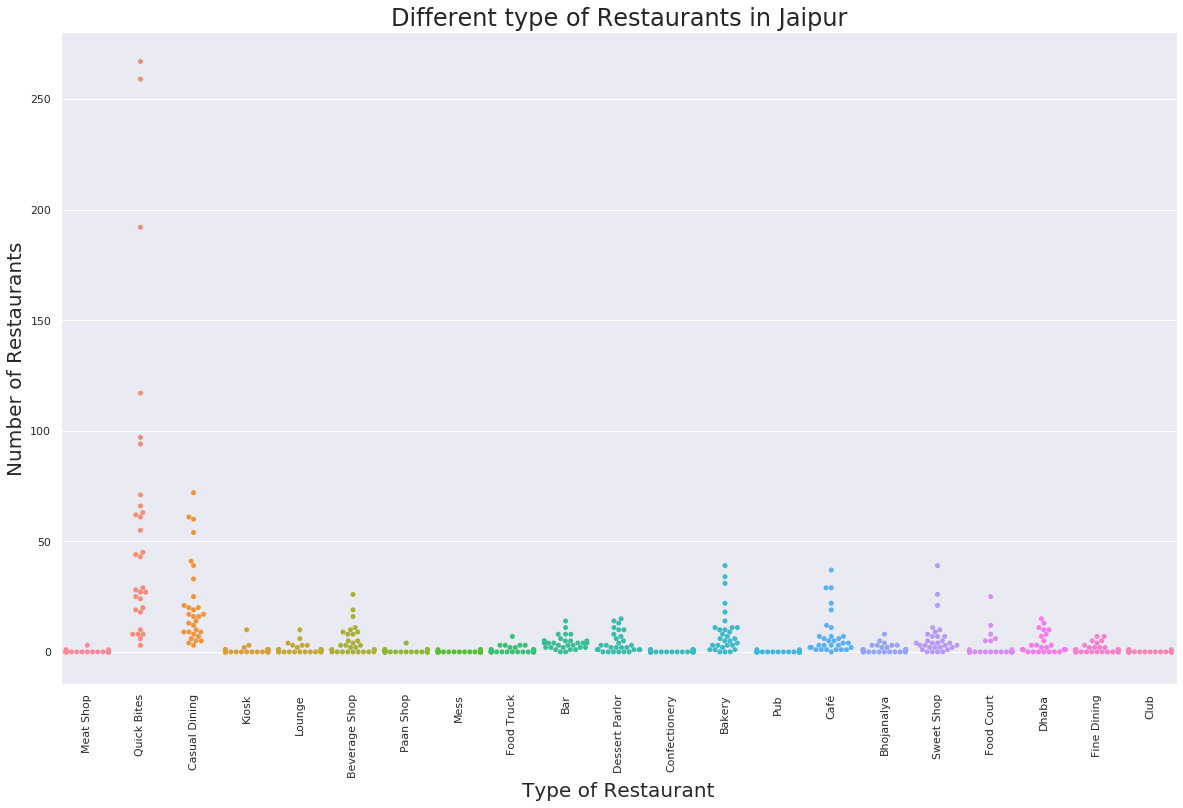

In [151]:
plt.figure(figsize=(20,12))
ax = sns.swarmplot(y='vals', x='cols', data=dfs)
plt.xticks(rotation=90)
ax.set_ylabel("Number of Restaurants", fontsize=20)
ax.set_xlabel("Type of Restaurant", fontsize=20)
ax.set_title("Different type of Restaurants in Jaipur", fontsize=24)
plt.savefig('swarmplot.png')

**We can see that there are more number of Quick Bites restaurants followed closely by Casual Dining restaurants.**

### Grouping the localities by Cuisines

In [152]:
CUISINES = set()
def func(x):
    if(type(x)==list):
        for y in x:
            CUISINES.add(y.strip())
_ = dataset['Cuisines'].str.split(', ').apply(func)

In [154]:
resCuisine = pd.DataFrame(columns=list(CUISINES))
resCuisine

,Asian,BBQ,Salad,American,Turkish,South Indian,Rajasthani,Momos,Andhra,Kebab,...,Healthy Food,Kerala,Street Food,Bubble Tea,Indian,Raw Meats,Hyderabadi,Ice Cream,Burger,Iranian


In [155]:
resCuisine['Locality'] = dataset.groupby('Locality').groups.keys()
resCuisine = resCuisine.set_index('Locality').fillna(0)
resCuisine

,Asian,BBQ,Salad,American,Turkish,South Indian,Rajasthani,Momos,Andhra,Kebab,...,Healthy Food,Kerala,Street Food,Bubble Tea,Indian,Raw Meats,Hyderabadi,Ice Cream,Burger,Iranian
Locality,,,,,,,,,,,,,,,,,,,,,
Adarsh Nagar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ajmer Highway,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amer Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bais Godam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bani Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bapu Nagar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C Scheme,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chitrakoot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
for i in range(0, len(dataset)):
    for type_ in CUISINES:
        if type(dataset.loc[i,'Cuisines']) == str and type_ in dataset.loc[i,'Cuisines']:
            resCuisine.loc[dataset.loc[i,'Locality'], type_] = resCuisine.loc[dataset.loc[i, 'Locality'], type_]+1

In [160]:
resCuisine

,Asian,BBQ,Salad,American,Turkish,South Indian,Rajasthani,Momos,Andhra,Kebab,...,Healthy Food,Kerala,Street Food,Bubble Tea,Indian,Raw Meats,Hyderabadi,Ice Cream,Burger,Iranian
Locality,,,,,,,,,,,,,,,,,,,,,
Adarsh Nagar,0,0,0,0,0,5,3,0,0,0,...,0,0,18,0,38,0,0,5,1,0
Ajmer Highway,0,0,0,1,0,14,4,2,0,0,...,1,0,6,0,66,0,0,2,2,0
Amer,0,0,0,0,0,5,2,0,0,0,...,0,0,2,0,19,0,0,0,0,0
Amer Road,0,0,0,0,1,5,8,0,0,0,...,0,0,4,0,52,0,0,0,0,0
Bais Godam,0,1,0,0,0,5,5,1,0,0,...,4,0,5,0,32,0,0,2,0,0
Bani Park,1,0,0,1,0,10,6,1,0,2,...,3,0,5,0,57,1,0,1,0,0
Bapu Nagar,0,0,0,0,0,4,1,0,0,1,...,0,0,3,0,9,0,0,1,0,0
C Scheme,3,0,3,2,0,19,10,1,0,1,...,9,0,25,0,95,0,2,9,6,0
Chitrakoot,0,0,1,0,0,12,4,3,0,1,...,3,0,8,0,61,1,0,2,2,0


### Top 15 Cuisines in Jaipur

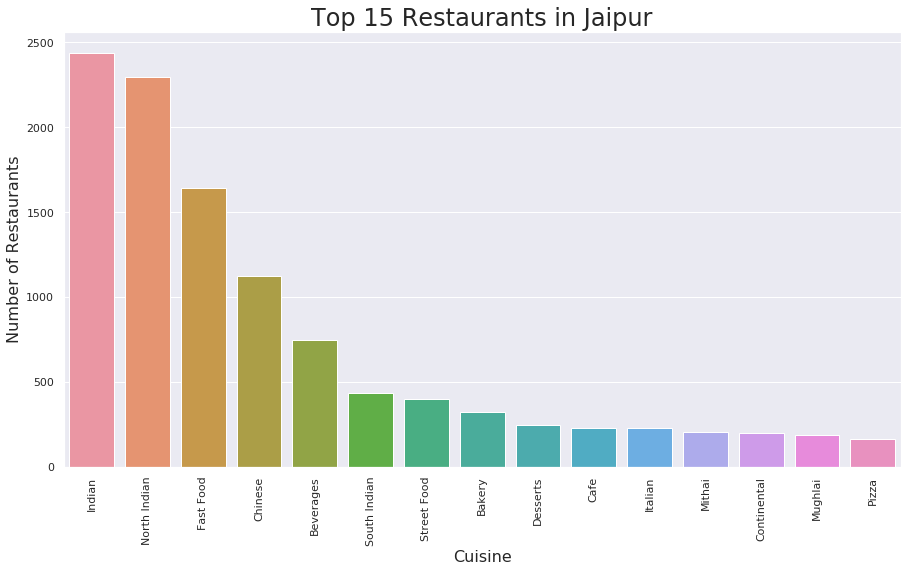

In [185]:
resCuisineCount = pd.DataFrame(resCuisine.sum(axis=0))
resCuisineCount.reset_index(inplace=True)
resCuisineCount.columns = ['Cuisine','resCount']
resCuisineCount.sort_values(['resCount'], ascending=False, inplace=True)
top15Res = resCuisineCount.head(15)
ax = sns.barplot(top15Res['Cuisine'], top15Res['resCount'])
plt.xticks(rotation=90)
ax.set_xlabel("Cuisine", fontsize=16)
ax.set_ylabel("Number of Restaurants", fontsize=16)
ax.set_title("Top 15 Restaurants in Jaipur", fontsize=24)
plt.savefig("Top15Cuisines.png")

### Top Rated Cuisines in Jaipur

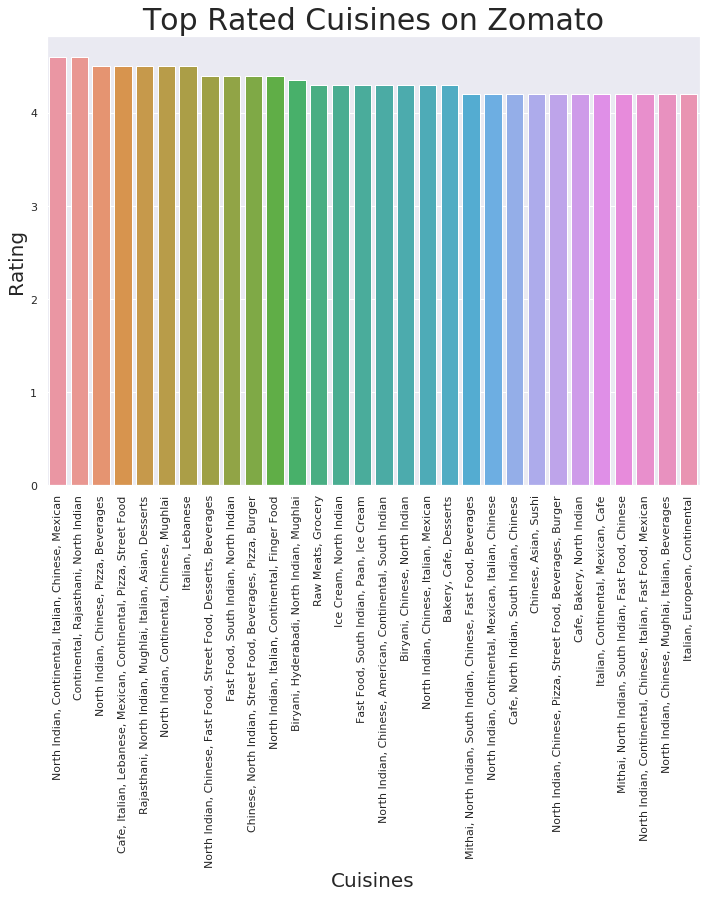

In [186]:
Cuisine_data_rating=(dataset.groupby(['Cuisines'], as_index=False)['Ratings'].mean())
Cuisine_data_rating.columns = ['Cuisines', 'Rating']
Top30_ratings= (Cuisine_data_rating.sort_values(['Rating'],ascending=False)).head(30)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(Top30_ratings['Cuisines'], Top30_ratings['Rating'])
plt.title('Top Rated Cuisines in Jaipur', fontsize=30)
plt.xlabel('Cuisines', fontsize=20)
plt.ylabel('Rating', fontsize=20)
plt.xticks(rotation = 90)
plt.show()

### Rating distribution of Restaurants

Text(0.5, 1.0, 'Distribution of Ratings')

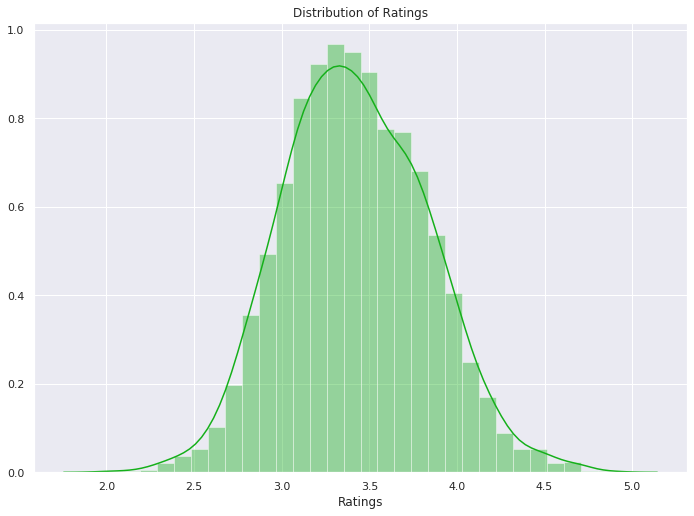

In [201]:
rateDist = dataset['Ratings'].dropna()
ax =sns.distplot(rateDist, hist=True, bins=30, color='#15b01a')
plt.title("Distribution of Ratings")

### Price range and ratings

In [226]:
costBinsMain = pd.IntervalIndex.from_tuples([
    (0,500),(501,1000),(1001,2000),(2001,3000),(3001,4000),(4001,5000),(5001,6000),(6001,7000),(7001,8000)
])
dataset['cost_cat'] = pd.cut(dataset['CostForTwo'], costBinsMain)

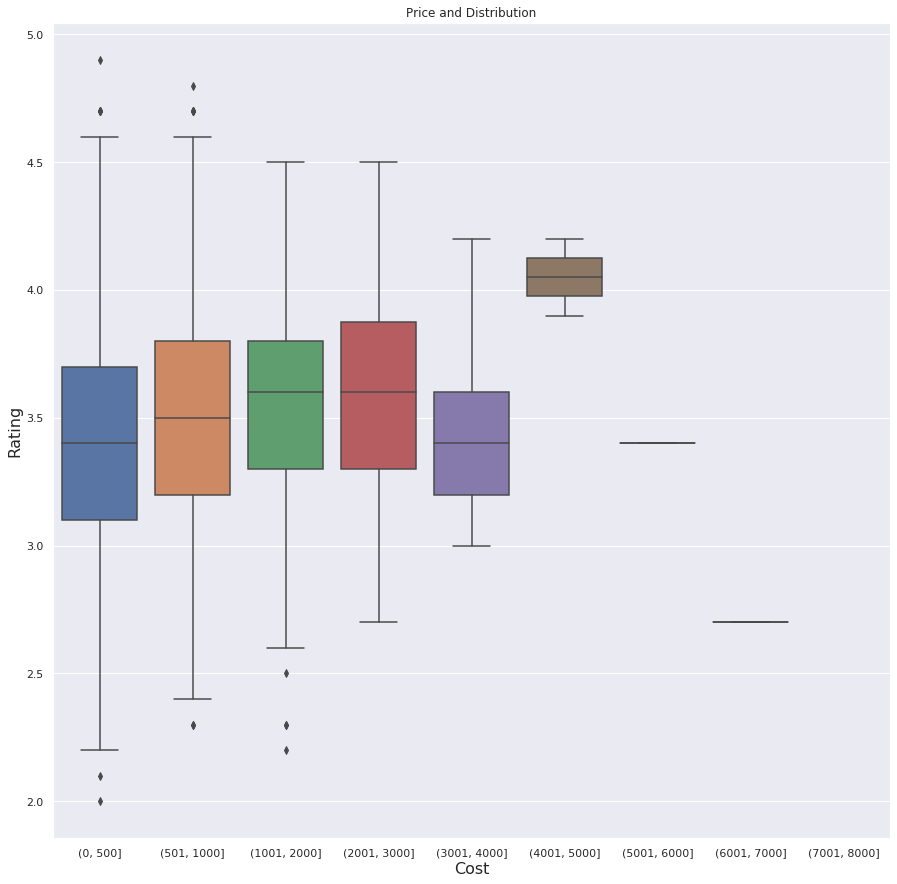

In [233]:
plt.figure(figsize=(15,15))
ax = sns.boxplot(x="cost_cat", y="Ratings", data=dataset)
ax.set_xlabel('Cost', fontsize=16)
ax.set_ylabel('Rating', fontsize=16)
ax.set_title('Price and Distribution')
# plt.savefig("box.png")
dataset.drop('cost_cat', axis=1, inplace=True)

**We can see that almost all the price categories have their 75% of the restaurants rated between 3.0 to 4.0, so we can say that increased price does not necessarily mean a higher rated restaurant.**

### Cuisine and Rating of a restaurant  
Does having more number of cuisines mean higher rating of the restaurant?

In [229]:
def fun(x):
    if(type(x)==list):
        return (len(x))
    else:
        return 0
dataset['numCuisines'] = dataset['Cuisines'].str.split(', ').apply(fun)

In [231]:
dataset.groupby('numCuisines')['Ratings'].mean()

numCuisines
1    3.363603
2    3.406291
3    3.461219
4    3.502907
5    3.534091
6    3.605405
7    3.590000
8    3.400000
Name: Ratings, dtype: float64

Yes, it can be seen that restaurants having more number of cuisines are rated higher

In [234]:
dataset.drop('numCuisines', axis=1, inplace=True)